In [94]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
from google.colab.patches import cv2_imshow

In [146]:
import os

import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab.patches import cv2_imshow


In [208]:
data_path = '/content/drive/MyDrive/ImageP_project01/images/'
label_file = '/content/drive/MyDrive/ImageP_project01/images/labels.csv'


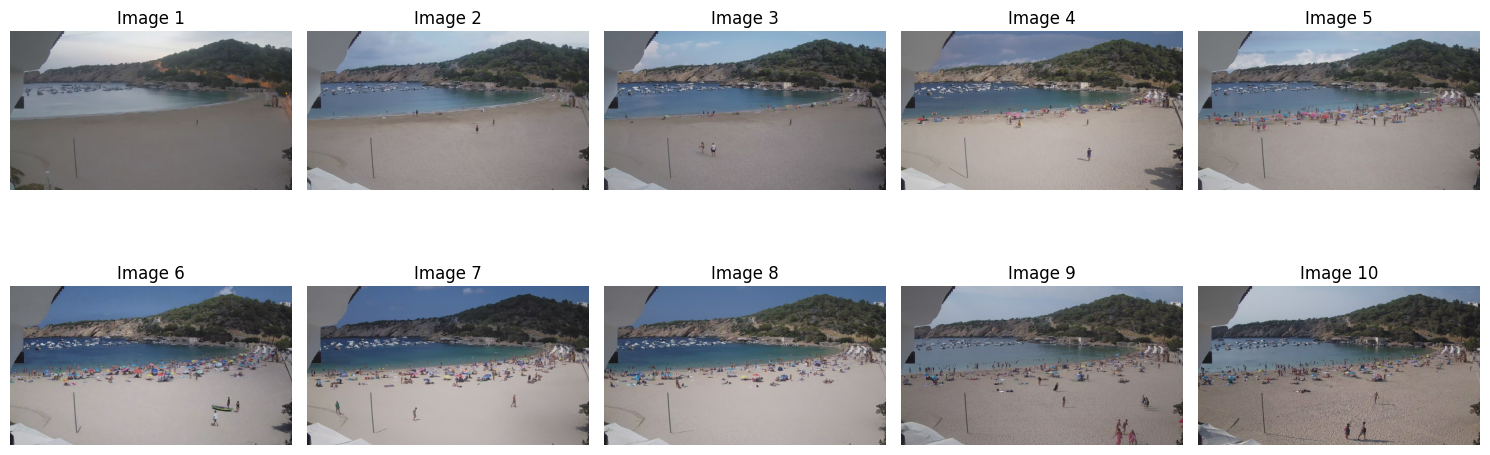

In [209]:
image_paths = [data_path + f'{i}.jpg' for i in range(10)]  # Adjusted range from 0 to 9
background_path = image_paths[0]  # Assuming the background is the first image

# Plot all images
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, ax in enumerate(axes.flatten()):
    # Read image
    image_path = image_paths[i]
    image = cv2.imread(image_path)

    if image is None:
        print(f"Image {i+1} could not be loaded from path: {image_path}")
        continue

    # Display the image
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.set_title(f"Image {i+1}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [210]:
df = pd.read_csv(label_file)
df.head()

Person  1157  654  1.jpg  1920  1080
0  Person   748  534  1.jpg  1920  1080
1  Person   723  541  1.jpg  1920  1080
2  Person  1061  504  1.jpg  1920  1080
3  Person   918  562  1.jpg  1920  1080
4  Person  1196  527  1.jpg  1920  1080

In [211]:
# Define column titles
columns = ['Label', 'X', 'Y', 'image_name', 'size_X', 'size_Y']

# Read the CSV file into a DataFrame with specified column names
df = pd.read_csv(label_file, names=columns)

# Display the first few rows of the DataFrame
print(df.head())

    Label     X    Y image_name  size_X  size_Y
0  Person  1157  654      1.jpg    1920    1080
1  Person   748  534      1.jpg    1920    1080
2  Person   723  541      1.jpg    1920    1080
3  Person  1061  504      1.jpg    1920    1080
4  Person   918  562      1.jpg    1920    1080


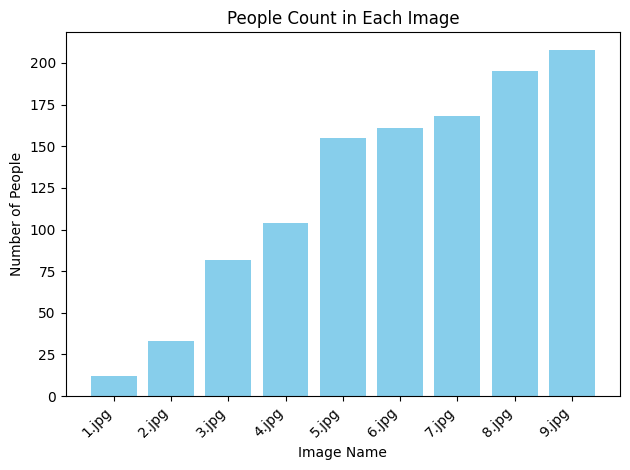

In [212]:
people_count = df.groupby('image_name')['Label'].count()

# Plotting the bar chart
plt.bar(people_count.index, people_count.values, color='skyblue')
plt.xlabel('Image Name')
plt.ylabel('Number of People')
plt.title('People Count in Each Image')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [213]:
result['ground_truths'] = ground_truths

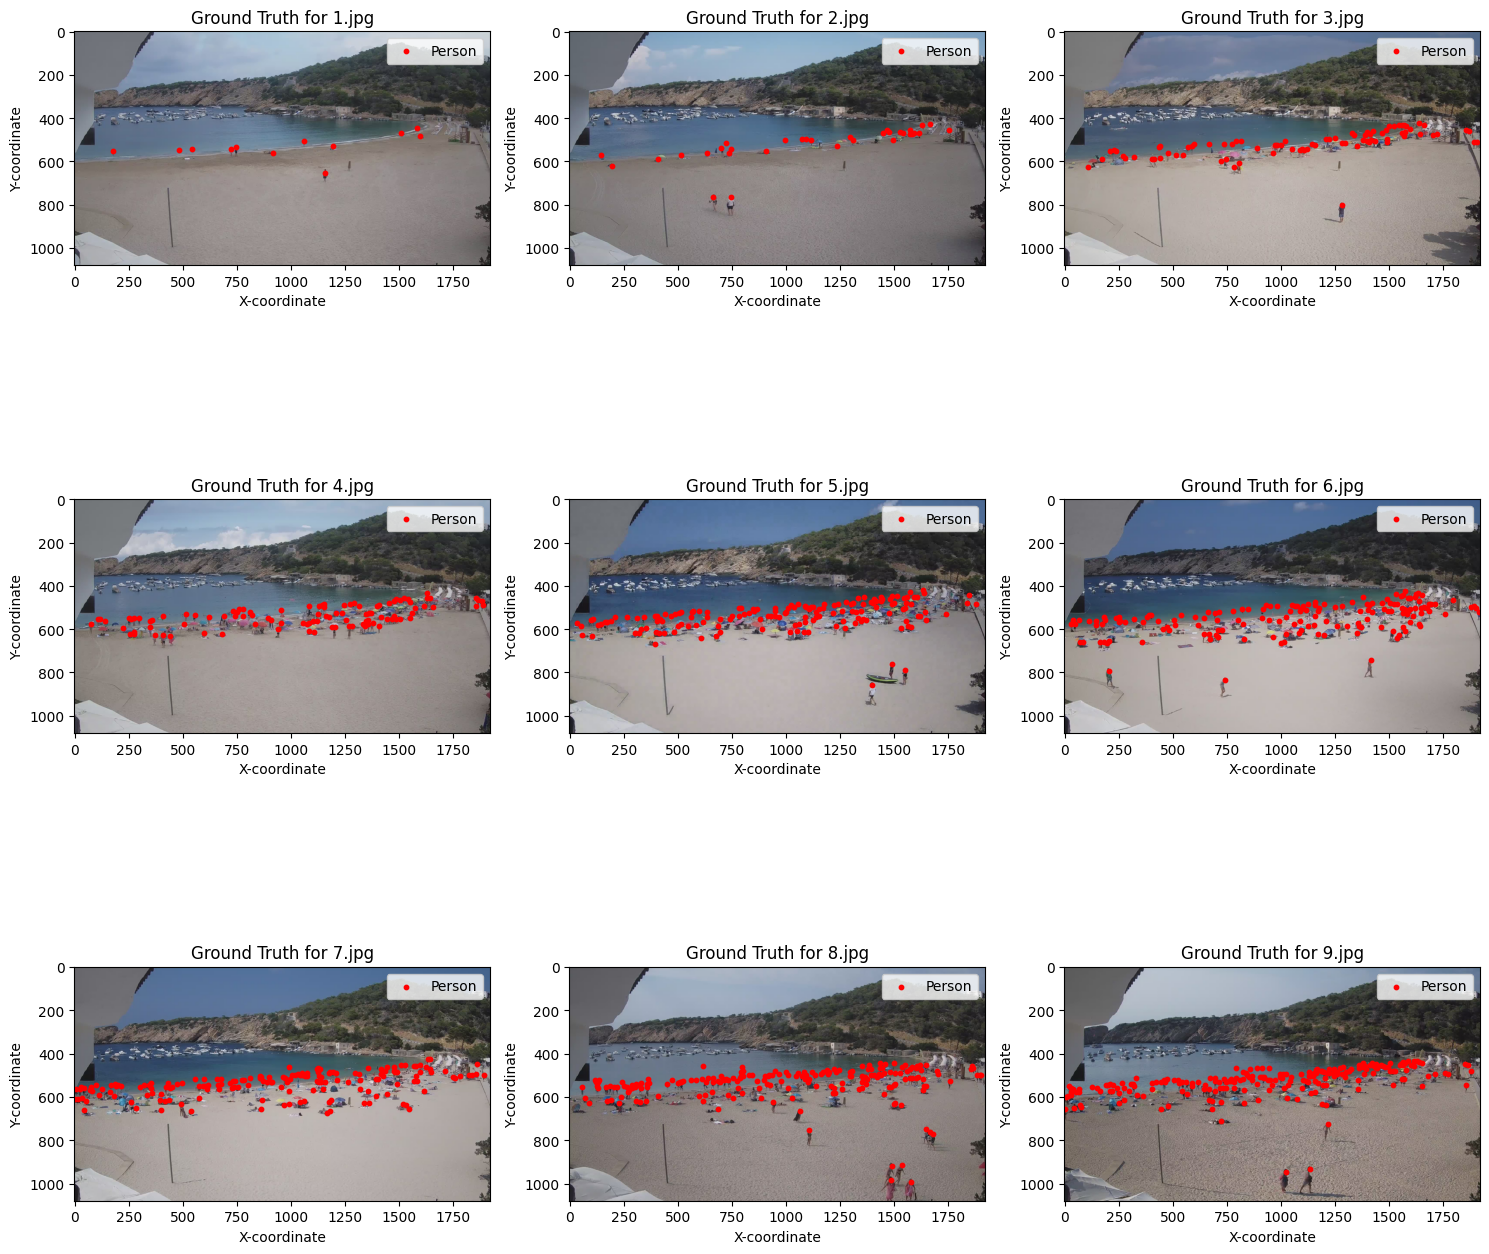

In [214]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
result['image'] = [f'{i}.jpg' for i in range(1, 10)]
ground_truths = []

# Loop through each image and draw points
for idx, image_name in enumerate(df['image_name'].unique()):
    image_data = df[df['image_name'] == image_name]
    ground_truths.append(len(image_data))

    image_path = data_path + image_name  # Replace with the actual path to your images
    image = cv2.imread(image_path)
    ax = axes[idx // 3, idx % 3]

    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax.scatter(image_data['X'], image_data['Y'], color='red', marker='o', label='Person', s=10)

    ax.set_title(f'Ground Truth for {image_name}')
    ax.set_xlabel('X-coordinate')
    ax.set_ylabel('Y-coordinate')
    ax.legend()

plt.tight_layout()
plt.show()

In [215]:
def read_image(image_path):
    """
    Read an image from the given path.
    """
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Could not read image from {image_path}")
    return image

In [216]:
counts = []
all_people_centroids = []
def load_image(image_path):
    return cv2.imread(image_path)


In [217]:
def load_and_preprocess_images(crowded_image_path, empty_image_path):
    # Load images
    crowded_beach = cv2.imread(crowded_image_path)
    empty_beach = cv2.imread(empty_image_path)

    # Convert images to LAB color space
    crowded_beach_lab = cv2.cvtColor(crowded_beach, cv2.COLOR_BGR2LAB)
    empty_beach_lab = cv2.cvtColor(empty_beach, cv2.COLOR_BGR2LAB)

    # Split LAB images into separate channels
    crowded_beach_l, crowded_beach_a, crowded_beach_b = cv2.split(crowded_beach_lab)
    empty_beach_l, empty_beach_a, empty_beach_b = cv2.split(empty_beach_lab)

    # Apply CLAHE to the L channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    crowded_beach_eq_l = clahe.apply(crowded_beach_l)
    empty_beach_eq_l = clahe.apply(empty_beach_l)

    # Merge the equalized L channel with original A and B channels
    crowded_beach_eq_lab = cv2.merge((crowded_beach_eq_l, crowded_beach_a, crowded_beach_b))
    empty_beach_eq_lab = cv2.merge((empty_beach_eq_l, empty_beach_a, empty_beach_b))

    # Convert LAB images back to BGR color space
    crowded_beach_eq = cv2.cvtColor(crowded_beach_eq_lab, cv2.COLOR_LAB2BGR)
    empty_beach_eq = cv2.cvtColor(empty_beach_eq_lab, cv2.COLOR_LAB2BGR)

    # Convert images to float32 for further processing
    crowded_beach_eq = crowded_beach_eq.astype(np.float32)
    empty_beach_eq = empty_beach_eq.astype(np.float32)

    return crowded_beach_eq, empty_beach_eq


In [218]:
def detect_people(image,crowded_beach):

    # Determine the dimensions of the image
    height, width = image.shape[:2]

    # Define the region of interest (ROI) as the bottom half of the image
    roi = image[height // 2 : height, :]

    # Convert the absolute difference image to uint8
    roi = roi.astype(np.uint8)

    # Apply Laplacian filter to highlight edges/features
    laplacian = roi

    # Threshold the Laplacian result to obtain a binary mask of potential people
    threshold_value = 70
    _, binary_mask = cv2.threshold(np.uint8(np.absolute(laplacian)), threshold_value, 255, cv2.THRESH_BINARY)

    # Convert the binary mask to a single-channel (grayscale) image
    binary_mask_gray = cv2.cvtColor(binary_mask, cv2.COLOR_BGR2GRAY)

    # Find connected components in the single-channel binary mask
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_mask_gray, connectivity=8)

    # Define minimum area and maximum area thresholds for filtering out small and large regions
    min_area = 30
    max_area = 150

    # Create a copy of the original image for drawing points
    image = crowded_beach.copy()
    # Initialize lists to store centroid coordinates and the number of people detected
    centroid_coordinates = []
    num_people = 0

    # Iterate through each detected component (excluding the background)
    for label in range(1, num_labels):
        # Check if the area of the component satisfies the area thresholds
        if min_area < stats[label, cv2.CC_STAT_AREA] < max_area:
            # Increment the counter for each detected person
            num_people += 1

            # Retrieve the centroid coordinates (x, y) in the ROI
            centroid_x, centroid_y = centroids[label]
            centroid = (int(centroid_x), int(centroid_y) + height // 2)  # Add offset for original image

            # Store the centroid coordinates in the list
            centroid_coordinates.append(centroid)

            # Draw a point at the centroid in the original image
            cv2.circle(crowded_beach, centroid, 5, (0, 255, 0), -1)  # Draw a point at the centroid

    return crowded_beach, num_people, centroid_coordinates  # Return the modified image, the number of people detected, and centroid coordinates





In [219]:
def main():
    fig, axes = plt.subplots(3, 3, figsize=(15, 15))
    centroids_all=[]
    for i, ax in enumerate(axes.flatten()):
        image_path = image_paths[i]

        # Load images
        image = load_image(image_path)
        background = load_image(background_path)

        if image is not None and background is not None:
            # Compute the absolute difference between the image and background
            diff_image = cv2.absdiff(image, background)

            # Detect people in the image
            image_detected, num_people_detected, centroids = detect_people(diff_image, image)

            # Save counts and centroids for each image
            counts.append(num_people_detected)
            all_people_centroids.append(centroids)

            # Display the modified image with rectangles (in red) around the detected persons
            ax.imshow(cv2.cvtColor(image_detected, cv2.COLOR_BGR2RGB))
            ax.set_title(f"Image {i+1}: People : {num_people_detected}")
            ax.axis('off')
    plt.tight_layout()
    plt.show()


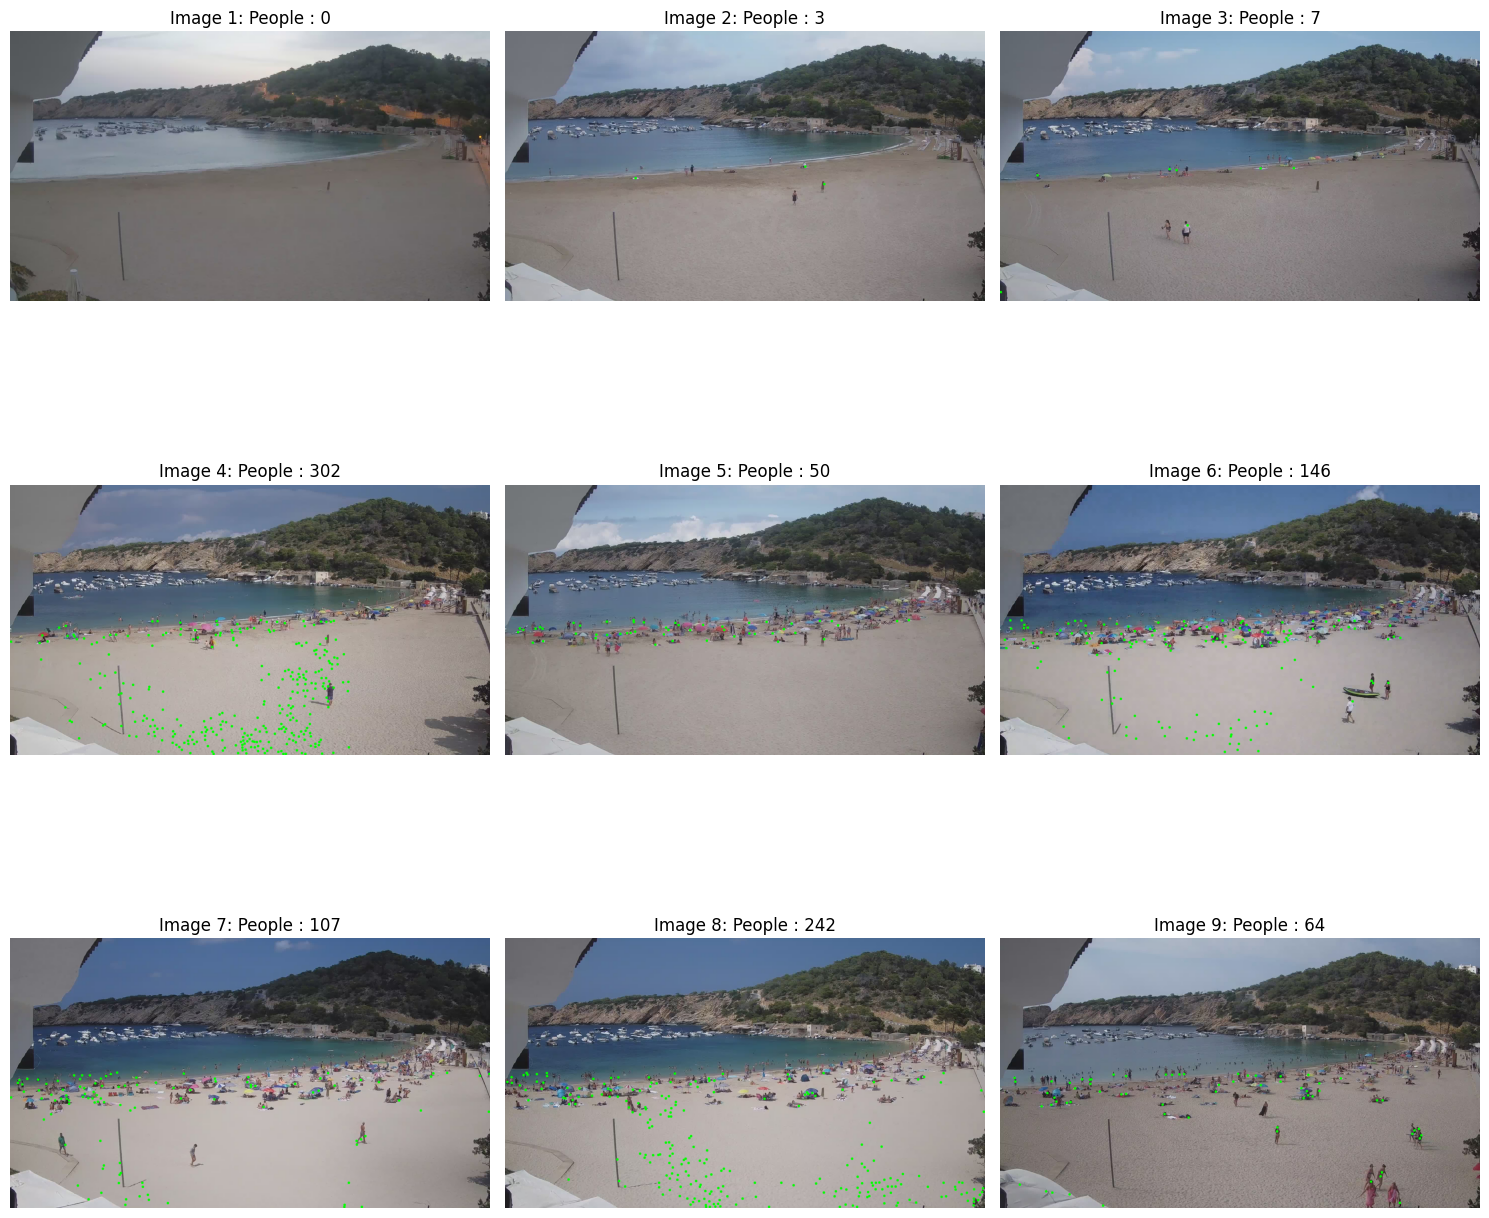

In [220]:
# Call the main function
main()

In [221]:
result['detected'] = counts
result

image  detected  ground_truths    mse  TP  FP   FN  Precision    Recall
0  1.jpg         0             12    144   0   0   12   0.000000  0.000000
1  2.jpg         3             33    441   0   0   33   0.000000  0.000000
2  3.jpg         7             82   2704   1   0   81   1.000000  0.012195
3  4.jpg       302            104   3481  10   3   94   0.769231  0.096154
4  5.jpg        50            155   2601  16   4  139   0.800000  0.103226
5  6.jpg       146            161   3136  18   4  143   0.818182  0.111801
6  7.jpg       107            168   3844  12   2  156   0.857143  0.071429
7  8.jpg       242            195  12321  16   3  179   0.842105  0.082051
8  9.jpg        64            208  13689  10   3  198   0.769231  0.048077

In [222]:
result['mse'] = np.power(result['ground_truths'] - result['detected'], 2)
result

image  detected  ground_truths    mse  TP  FP   FN  Precision    Recall
0  1.jpg         0             12    144   0   0   12   0.000000  0.000000
1  2.jpg         3             33    900   0   0   33   0.000000  0.000000
2  3.jpg         7             82   5625   1   0   81   1.000000  0.012195
3  4.jpg       302            104  39204  10   3   94   0.769231  0.096154
4  5.jpg        50            155  11025  16   4  139   0.800000  0.103226
5  6.jpg       146            161    225  18   4  143   0.818182  0.111801
6  7.jpg       107            168   3721  12   2  156   0.857143  0.071429
7  8.jpg       242            195   2209  16   3  179   0.842105  0.082051
8  9.jpg        64            208  20736  10   3  198   0.769231  0.048077

In [223]:
print(f"Mean MSE: {result['mse'].mean()}")

Mean MSE: 9309.888888888889


In [224]:
# Function to read centroid coordinates from text files
def read_centroid_coordinates(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Extracting coordinates from text file
    coordinates = []
    for line in lines[2:]:  # Skip the first two lines containing titles and "Centroid Coordinates"
        line = line.strip().split(': ')[1]  # Extracting coordinates part
        coord = tuple(map(int, line[1:-1].split(', ')))  # Converting string coordinates to tuple
        coordinates.append(coord)

    return coordinates

In [225]:
def calculate_distances(detected_positions, ground_truth_positions):
    distances = np.zeros((len(detected_positions), len(ground_truth_positions)))

    for i, det_pos in enumerate(detected_positions):
        for j, gt_pos in enumerate(ground_truth_positions):
            distances[i, j] = np.linalg.norm(np.array(det_pos) - np.array(gt_pos))

    return distances

In [226]:
def calculate_metrics(detected_positions, ground_truth_positions, distance_threshold):
    distances = calculate_distances(detected_positions, ground_truth_positions)

    # Initialize arrays to keep track of detection status
    detected_flags = np.zeros(len(detected_positions), dtype=bool)
    ground_truth_flags = np.zeros(len(ground_truth_positions), dtype=bool)

    # True positives (TP), False positives (FP), False negatives (FN)
    TP, FP, FN = 0, 0, 0

    for j in range(distances.shape[1]):
        min_distance_idx = np.argmin(distances[:, j])
        min_distance = distances[min_distance_idx, j]

        # If the minimum distance is less than the threshold, consider it a detection
        if min_distance < distance_threshold:
            detected_idx, ground_truth_idx = min_distance_idx, j

            # Check if the points have already been matched
            if not detected_flags[detected_idx] and not ground_truth_flags[ground_truth_idx]:
                TP += 1
                detected_flags[detected_idx] = True
                ground_truth_flags[ground_truth_idx] = True
            else:
                FP += 1

    # Calculate remaining unmatched ground truths as false negatives
    FN = np.sum(~ground_truth_flags)

    return TP, FP, FN

In [227]:
tps, fps, fns = [], [], []
images = [f'{i}.jpg' for i in range(1, 10)]

for index, image in enumerate(images):
    one_image = df[df['image_name'] == image]

    ground_truth_positions = list(zip(one_image['X'], one_image['Y']))

    detected_positions = all_people_centroids[index]
    distance_threshold = 15

    # Check if detected_positions is not empty before calculating metrics
    if len(detected_positions) > 0:
        TP, FP, FN = calculate_metrics(detected_positions, ground_truth_positions, distance_threshold)
    else:
        TP, FP, FN = 0, 0, len(ground_truth_positions)  # All ground truth are False Negatives if no detections

    tps.append(TP)
    fps.append(FP)
    fns.append(FN)

In [228]:
result["TP"] = tps
result["FP"] = fps
result["FN"] = fns
result

image  detected  ground_truths    mse  TP  FP   FN  Precision    Recall
0  1.jpg         0             12    144   0   0   12   0.000000  0.000000
1  2.jpg         3             33    900   0   0   33   0.000000  0.000000
2  3.jpg         7             82   5625   1   0   81   1.000000  0.012195
3  4.jpg       302            104  39204  10   3   94   0.769231  0.096154
4  5.jpg        50            155  11025  16   4  139   0.800000  0.103226
5  6.jpg       146            161    225  18   4  143   0.818182  0.111801
6  7.jpg       107            168   3721  12   2  156   0.857143  0.071429
7  8.jpg       242            195   2209  16   3  179   0.842105  0.082051
8  9.jpg        64            208  20736  10   3  198   0.769231  0.048077

In [229]:
result['Precision'] = result['TP'] / (result['TP'] + result['FP']).replace(0, 1)
result['Recall'] = result['TP'] / (result['TP'] + result['FN']).replace(0, 1)
result

image  detected  ground_truths    mse  TP  FP   FN  Precision    Recall
0  1.jpg         0             12    144   0   0   12   0.000000  0.000000
1  2.jpg         3             33    900   0   0   33   0.000000  0.000000
2  3.jpg         7             82   5625   1   0   81   1.000000  0.012195
3  4.jpg       302            104  39204  10   3   94   0.769231  0.096154
4  5.jpg        50            155  11025  16   4  139   0.800000  0.103226
5  6.jpg       146            161    225  18   4  143   0.818182  0.111801
6  7.jpg       107            168   3721  12   2  156   0.857143  0.071429
7  8.jpg       242            195   2209  16   3  179   0.842105  0.082051
8  9.jpg        64            208  20736  10   3  198   0.769231  0.048077

# New section

Crowd counting with Sobel edge detection

In [231]:

def detect_people_with_sobel(crowded_beach_dif,crowded_beach):

    # Determine the dimensions of the image
    height, width = crowded_beach_dif.shape[:2]

    # Define the region of interest (ROI) as the bottom half of the image
    roi = crowded_beach_dif[height // 2:height, :]

    # Convert the ROI to grayscale
    roi_gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)

    # Apply Sobel operation on the ROI
    sobelx = cv2.Sobel(roi_gray, cv2.CV_32F, 1, 0)  # Sobel in x-direction
    sobely = cv2.Sobel(roi_gray, cv2.CV_32F, 0, 1)  # Sobel in y-direction

    # Calculate the magnitude of gradients
    gradient_magnitude = cv2.magnitude(sobelx, sobely)

    # Threshold the gradient magnitude to identify regions with high gradients
    thresh_value = np.mean(gradient_magnitude) * 13.5  # Adjust this threshold as needed
    binary_image = gradient_magnitude > thresh_value

    # Perform morphological operations for better segmentation (optional)
    binary_image = cv2.morphologyEx(binary_image.astype(np.uint8), cv2.MORPH_CLOSE,
                                  cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (8, 8)))

    # Label connected components to count segmented regions and get centroids
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image.astype(np.uint8))

    # Draw points (centroids) on the original image
    result_img = crowded_beach.copy()

    detected_coordinates = []
    for centroid in centroids[1:]:  # Skip the first centroid (background)
        x, y = np.round(centroid).astype(int)
        cv2.circle(result_img, (x, y + height // 2), 5, (0, 255, 0), -1)  # Draw a green circle at the centroid
        detected_coordinates.append((x, y + height // 2))

    # Return number of persons detected and their coordinates
    return result_img, num_labels - 1, detected_coordinates


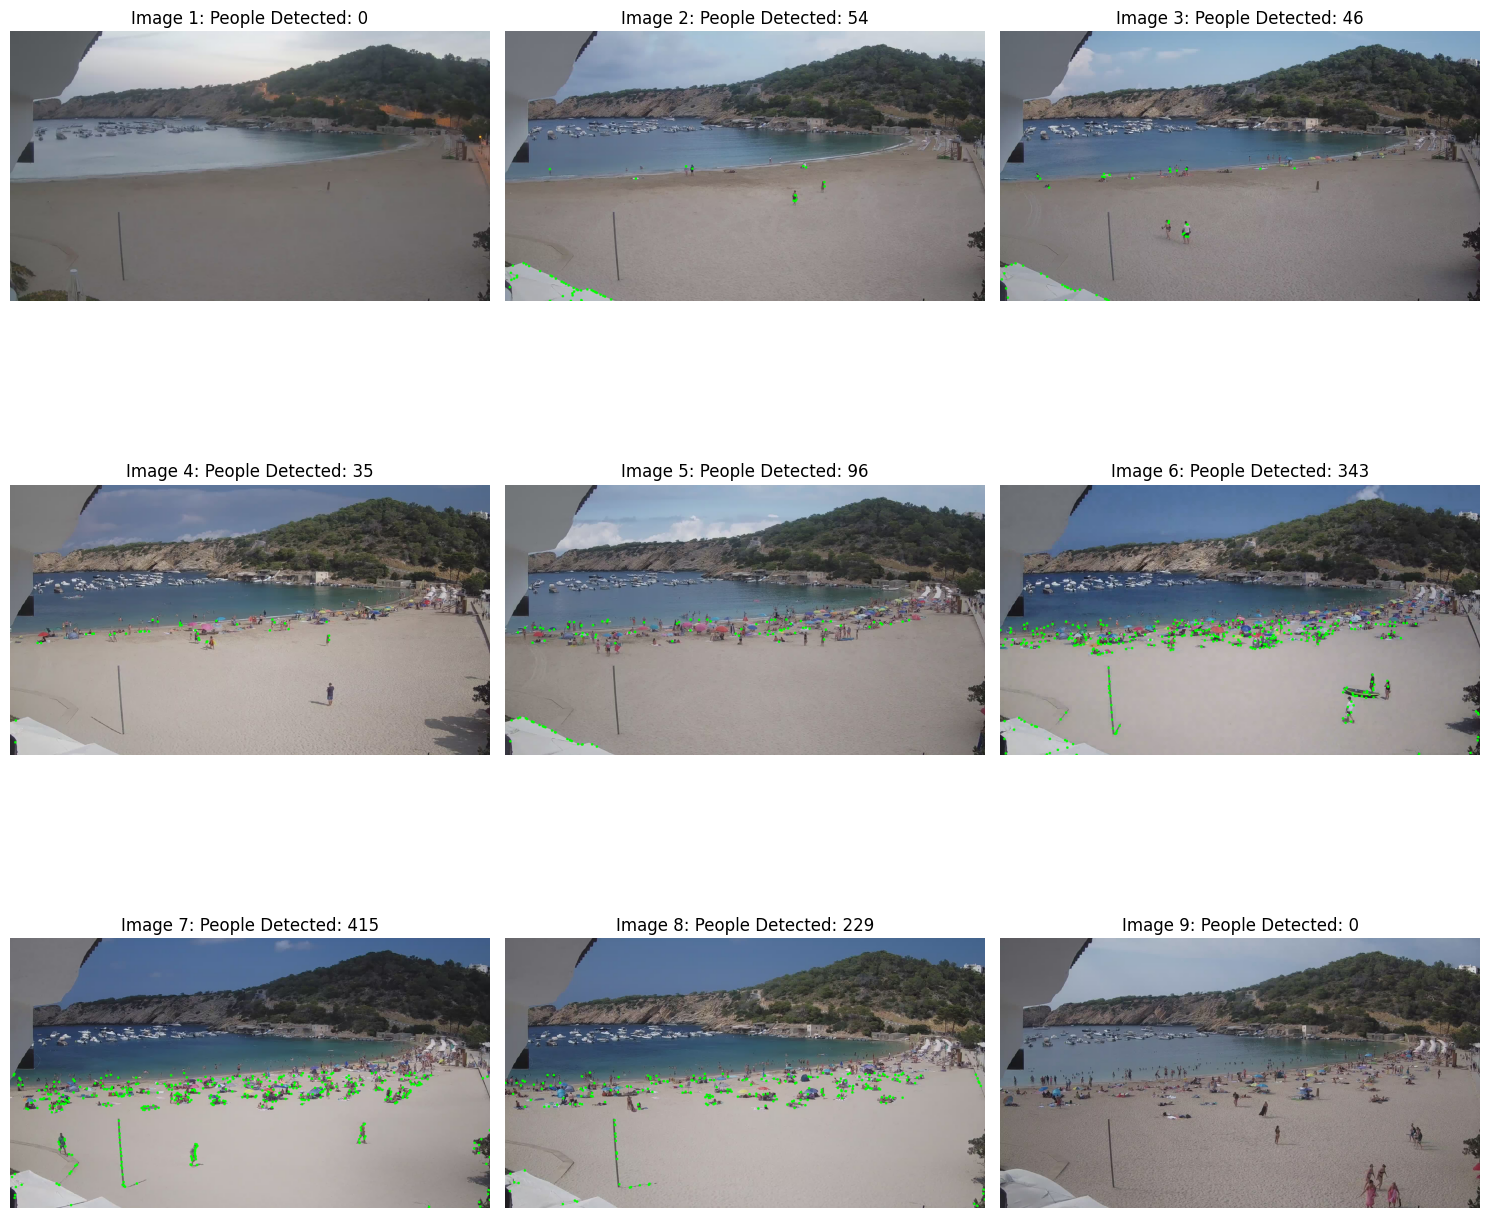

In [265]:

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
counts2 = []
all_people_centroids2 = []

for i, ax in enumerate(axes.flatten()):
    image_path = image_paths[i]

    # Load images
    image = load_image(image_path)
    background = load_image(background_path)

    if image is not None and background is not None:
        # Compute the absolute difference between the image and background
        diff_image = cv2.absdiff(image, background)

        # Detect people in the image using Sobel edge detection
        image,num_people_detected, centroids = detect_people_with_sobel(diff_image,image)

        # Save counts and centroids for each image
        counts2.append(num_people_detected)
        all_people_centroids2.append(centroids)

        # Display the modified image with detected persons
        ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        ax.set_title(f"Image {i+1}: People Detected: {num_people_detected}")
        ax.axis('off')

plt.tight_layout()
plt.show()



In [258]:
print(counts2[4])

96


In [259]:
result2 = result.copy()
result2.drop(result2.index, inplace=True)


In [262]:
result2['ground_truths'] = ground_truths
result2['detected'] = counts2
result2['image'] = [f'{i}.jpg' for i in range(1, 10)]

In [263]:
result2['mse'] = np.power(result2['ground_truths'] - result2['detected'], 2)
result2

image  detected  ground_truths    mse  TP  FP  FN  Precision  Recall
0  1.jpg         0             12    144 NaN NaN NaN        NaN     NaN
1  2.jpg        54             33    441 NaN NaN NaN        NaN     NaN
2  3.jpg        46             82   1296 NaN NaN NaN        NaN     NaN
3  4.jpg        35            104   4761 NaN NaN NaN        NaN     NaN
4  5.jpg        96            155   3481 NaN NaN NaN        NaN     NaN
5  6.jpg       343            161  33124 NaN NaN NaN        NaN     NaN
6  7.jpg       415            168  61009 NaN NaN NaN        NaN     NaN
7  8.jpg       229            195   1156 NaN NaN NaN        NaN     NaN
8  9.jpg         0            208  43264 NaN NaN NaN        NaN     NaN

In [264]:
tps, fps, fns = [], [], []
images = [f'{i}.jpg' for i in range(1, 10)]

for index, image in enumerate(images):
    one_image = df[df['image_name'] == image]

    ground_truth_positions = list(zip(one_image['X'], one_image['Y']))

    detected_positions = all_people_centroids2[index]
    distance_threshold = 15

    # Check if detected_positions is not empty before calculating metrics
    if len(detected_positions) > 0:
        TP, FP, FN = calculate_metrics(detected_positions, ground_truth_positions, distance_threshold)
    else:
        TP, FP, FN = 0, 0, len(ground_truth_positions)  # All ground truth are False Negatives if no detections

    tps.append(TP)
    fps.append(FP)
    fns.append(FN)

In [266]:
result["TP"] = tps
result["FP"] = fps
result["FN"] = fns
result

image  detected  ground_truths    mse  TP  FP   FN  Precision    Recall
0  1.jpg         0             12    144   0   0   12   0.000000  0.000000
1  2.jpg         3             33    900   1   0   32   0.000000  0.000000
2  3.jpg         7             82   5625   5   0   77   1.000000  0.012195
3  4.jpg       302            104  39204   4   0  100   0.769231  0.096154
4  5.jpg        50            155  11025  26   5  129   0.800000  0.103226
5  6.jpg       146            161    225  41   3  120   0.818182  0.111801
6  7.jpg       107            168   3721  32   5  136   0.857143  0.071429
7  8.jpg       242            195   2209  28   5  167   0.842105  0.082051
8  9.jpg        64            208  20736   0   0  208   0.769231  0.048077

In [267]:
result['Precision'] = result['TP'] / (result['TP'] + result['FP']).replace(0, 1)
result['Recall'] = result['TP'] / (result['TP'] + result['FN']).replace(0, 1)
result

image  detected  ground_truths    mse  TP  FP   FN  Precision    Recall
0  1.jpg         0             12    144   0   0   12   0.000000  0.000000
1  2.jpg         3             33    900   1   0   32   1.000000  0.030303
2  3.jpg         7             82   5625   5   0   77   1.000000  0.060976
3  4.jpg       302            104  39204   4   0  100   1.000000  0.038462
4  5.jpg        50            155  11025  26   5  129   0.838710  0.167742
5  6.jpg       146            161    225  41   3  120   0.931818  0.254658
6  7.jpg       107            168   3721  32   5  136   0.864865  0.190476
7  8.jpg       242            195   2209  28   5  167   0.848485  0.143590
8  9.jpg        64            208  20736   0   0  208   0.000000  0.000000